<a href="https://colab.research.google.com/github/nestorpalacios/MVP1/blob/main/MVP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 59.2 MB/s eta 0:00:00


In [ ]:
## Carrega bibliotecas utilizadas

import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D
import plotly.express as px
import plotly.graph_objects as go

import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from IPython.display import display, Markdown
import seaborn

In [ ]:

## Verifica a versão da matplotlib instalada
mpl.__version__

'3.5.3'

In [360]:
# carga do dataset através de um arquivo
filename1 = 'https://raw.githubusercontent.com/nestorpalacios/MVP1/main/masterwell.csv' # este arquivo deve estar dentro da aba "Arquivos" do Colab
filename2 = 'https://raw.githubusercontent.com/nestorpalacios/MVP1/main/prdWell.csv' # este arquivo deve estar dentro da aba "Arquivos" do Colab
masterwell = pd.read_csv(filename1) # se o cabeçalho estiver sendo importado como dados, use o parâmetro skiprows = 1 na função read_csv
prodwell = pd.read_csv(filename2, parse_dates=['DATE'], dayfirst=True) # se o cabeçalho estiver sendo importado como dados, use o parâmetro skiprows = 1 na função read_csv
# verifica o tipo de iris
print(type(masterwell))
print(type(prodwell))

# exibe as 5 primeiras linhas
masterwell.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Completion Wellbore      xcoor        ycoor  Avg_depth Sand Station
0     AL-1:A     AL-1  478926.98  10851477.60     4318.0    A   LB-02
1    AL-10:A    AL-10  478268.42  10850586.12     5153.0    A   LB-03
2    AL-10:C    AL-10  478268.42  10850586.12        NaN    C   LB-03
3    AL-11:B    AL-11  477892.10  10850510.88     3802.0    B   LB-03
4    AL-12:B    AL-12  477211.00  10849454.10     3624.0    B   LB-01

In [361]:
masterwell.isnull().sum()

Completion     0
Wellbore       0
xcoor          0
ycoor          0
Avg_depth     11
Sand           0
Station        0
dtype: int64

<AxesSubplot:>

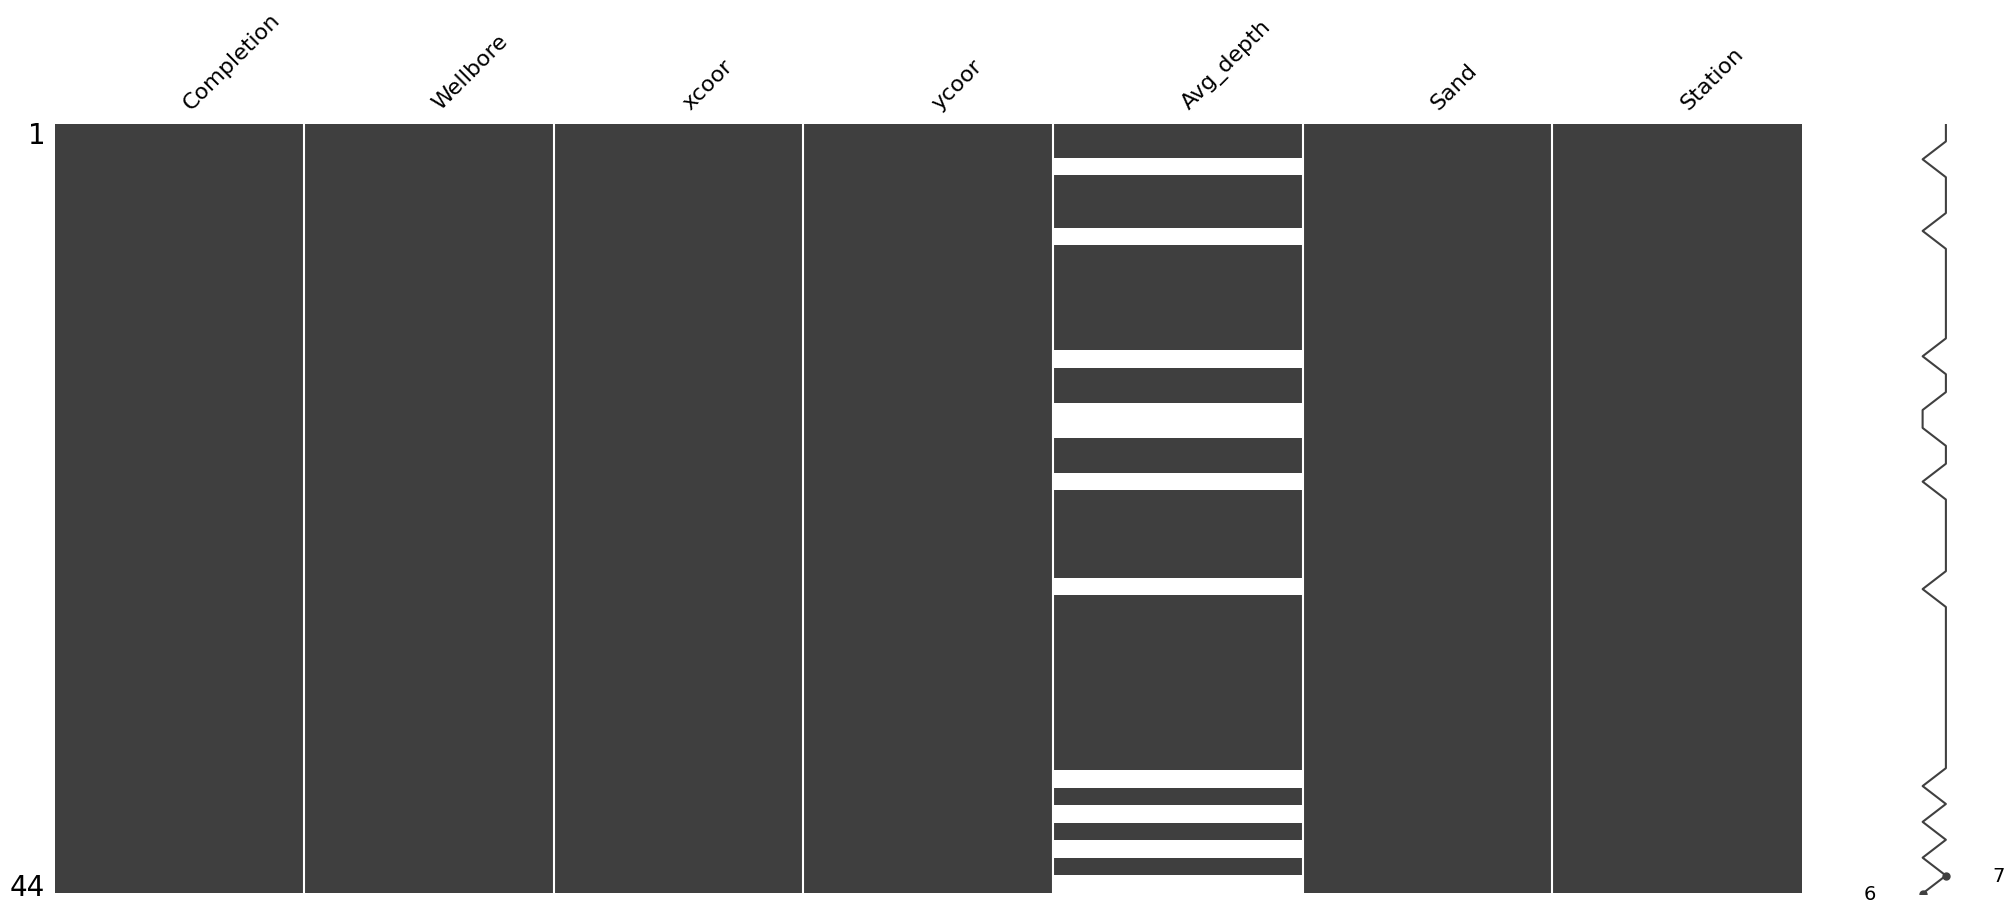

In [362]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(masterwell.columns)

# o novo dataset irá conter todas as colunas do dataset original
masterwellSemMissings = masterwell[col[:]]

# substituindo os zeros por NaN
masterwellSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(masterwellSemMissings)

In [363]:
masterwellSemMissings.isnull().sum()

Completion     0
Wellbore       0
xcoor          0
ycoor          0
Avg_depth     11
Sand           0
Station        0
dtype: int64

In [364]:
masterwellSemMissings.count()

Completion    44
Wellbore      44
xcoor         44
ycoor         44
Avg_depth     33
Sand          44
Station       44
dtype: int64

In [365]:
masterwellSemMissings.describe()

xcoor         ycoor    Avg_depth
count      44.000000  4.400000e+01    33.000000
mean   477984.683495  1.085019e+07  4046.636364
std       546.235514  7.222532e+02   549.034711
min    477187.480000  1.084863e+07  3513.000000
25%    477546.895000  1.084958e+07  3650.000000
50%    477885.730000  1.085019e+07  3778.000000
75%    478268.420000  1.085071e+07  4353.000000
max    479065.160000  1.085152e+07  5313.000000

In [366]:
masterwellSemMissings.nunique()

Completion    44
Wellbore      36
xcoor         36
ycoor         36
Avg_depth     33
Sand           3
Station        4
dtype: int64

In [367]:
prodwell.isnull().sum()

DATE             0
Completion       0
pet            321
gas            998
agua          1732
dtype: int64

<AxesSubplot:>

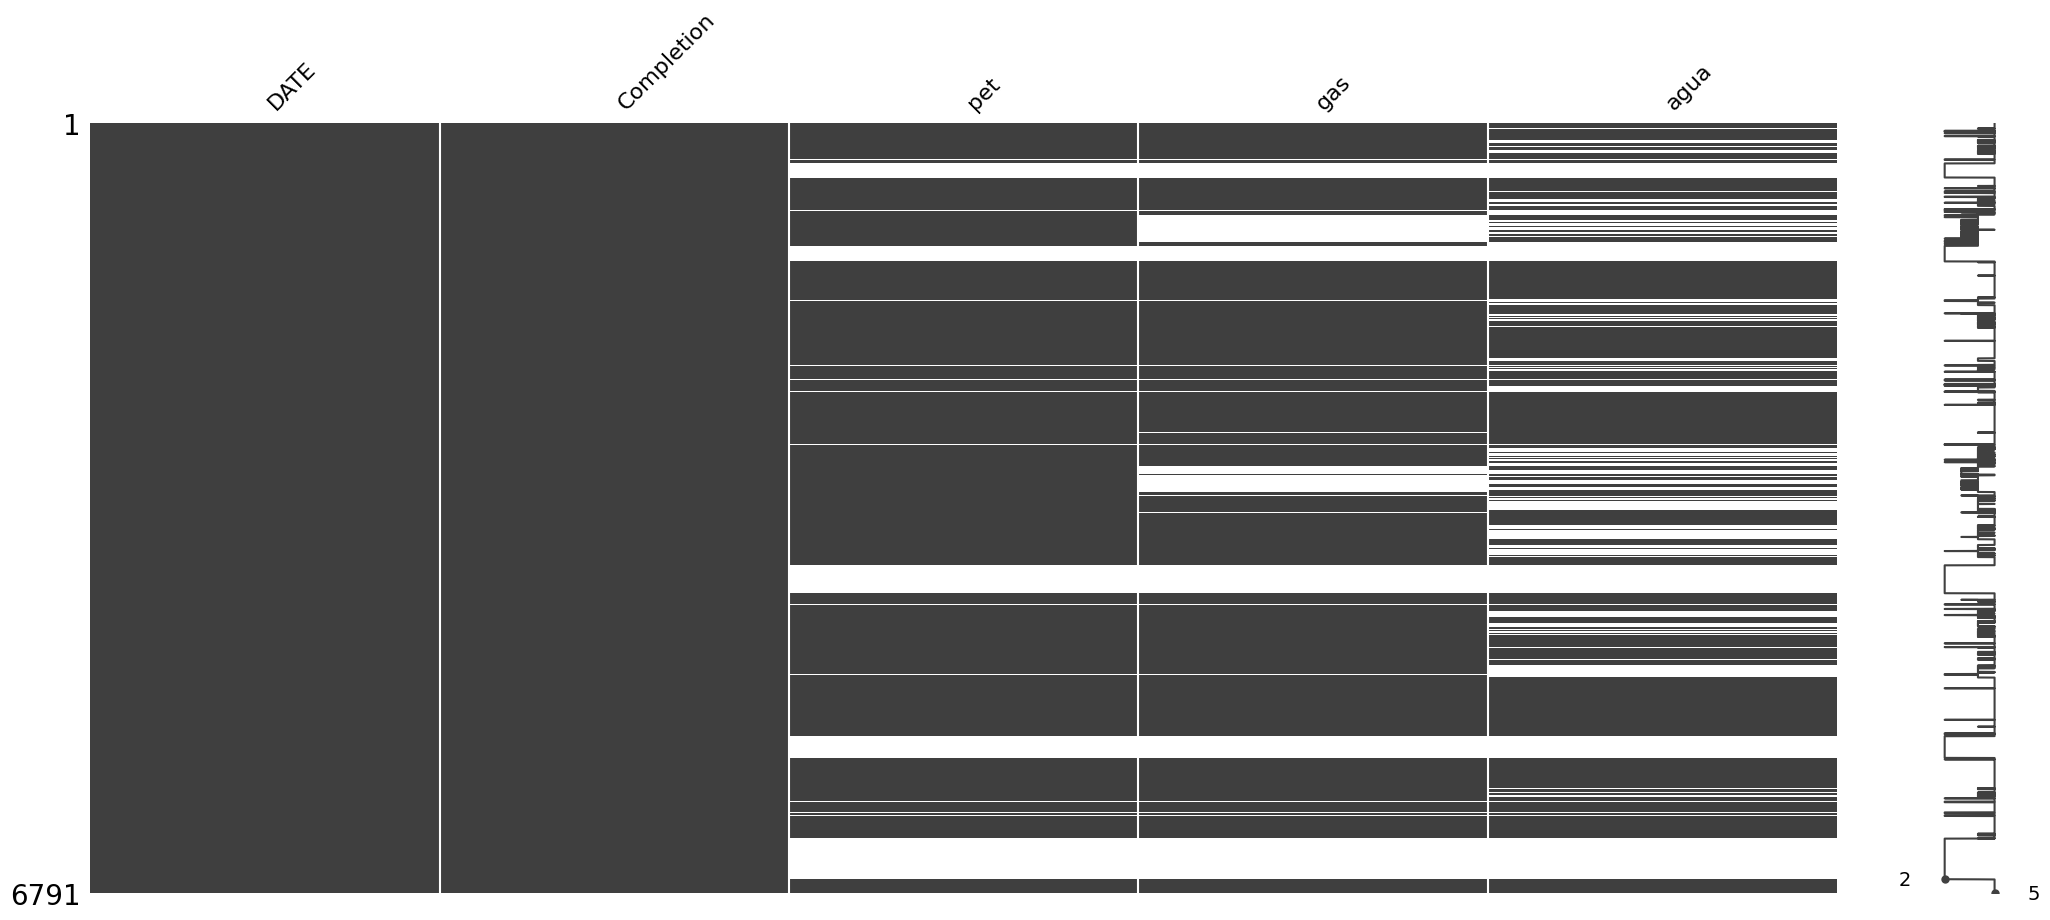

In [368]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(prodwell.columns)

# o novo dataset irá conter todas as colunas do dataset original
prodwellSemMissings = prodwell[col[:]]

# substituindo os zeros por NaN
prodwellSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(prodwellSemMissings)

In [369]:
prodwellSemMissings.isnull().sum()

DATE             0
Completion       0
pet           1192
gas           1657
agua          2475
dtype: int64

<AxesSubplot:>

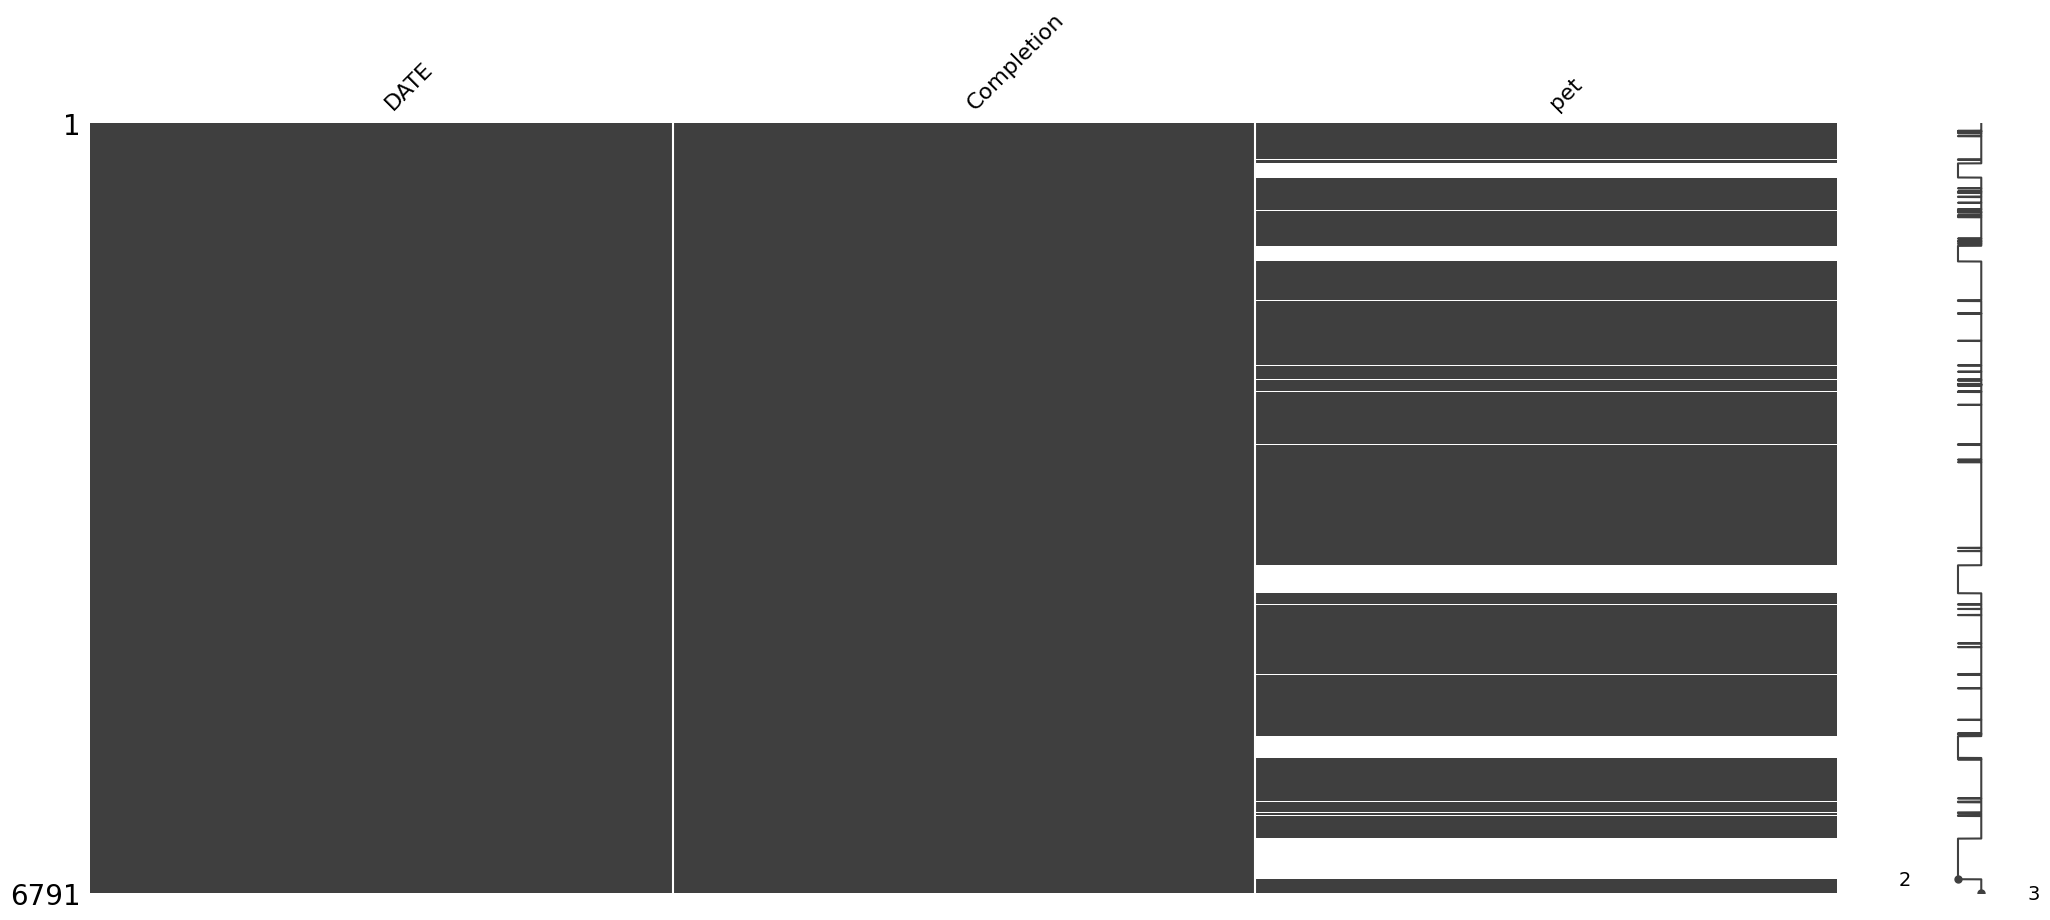

In [370]:
# removendo as colunas 'SkinThickness' e 'Insulin'
prodwellSemMissings.drop(['gas', 'agua'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(prodwellSemMissings)
     

<AxesSubplot:>

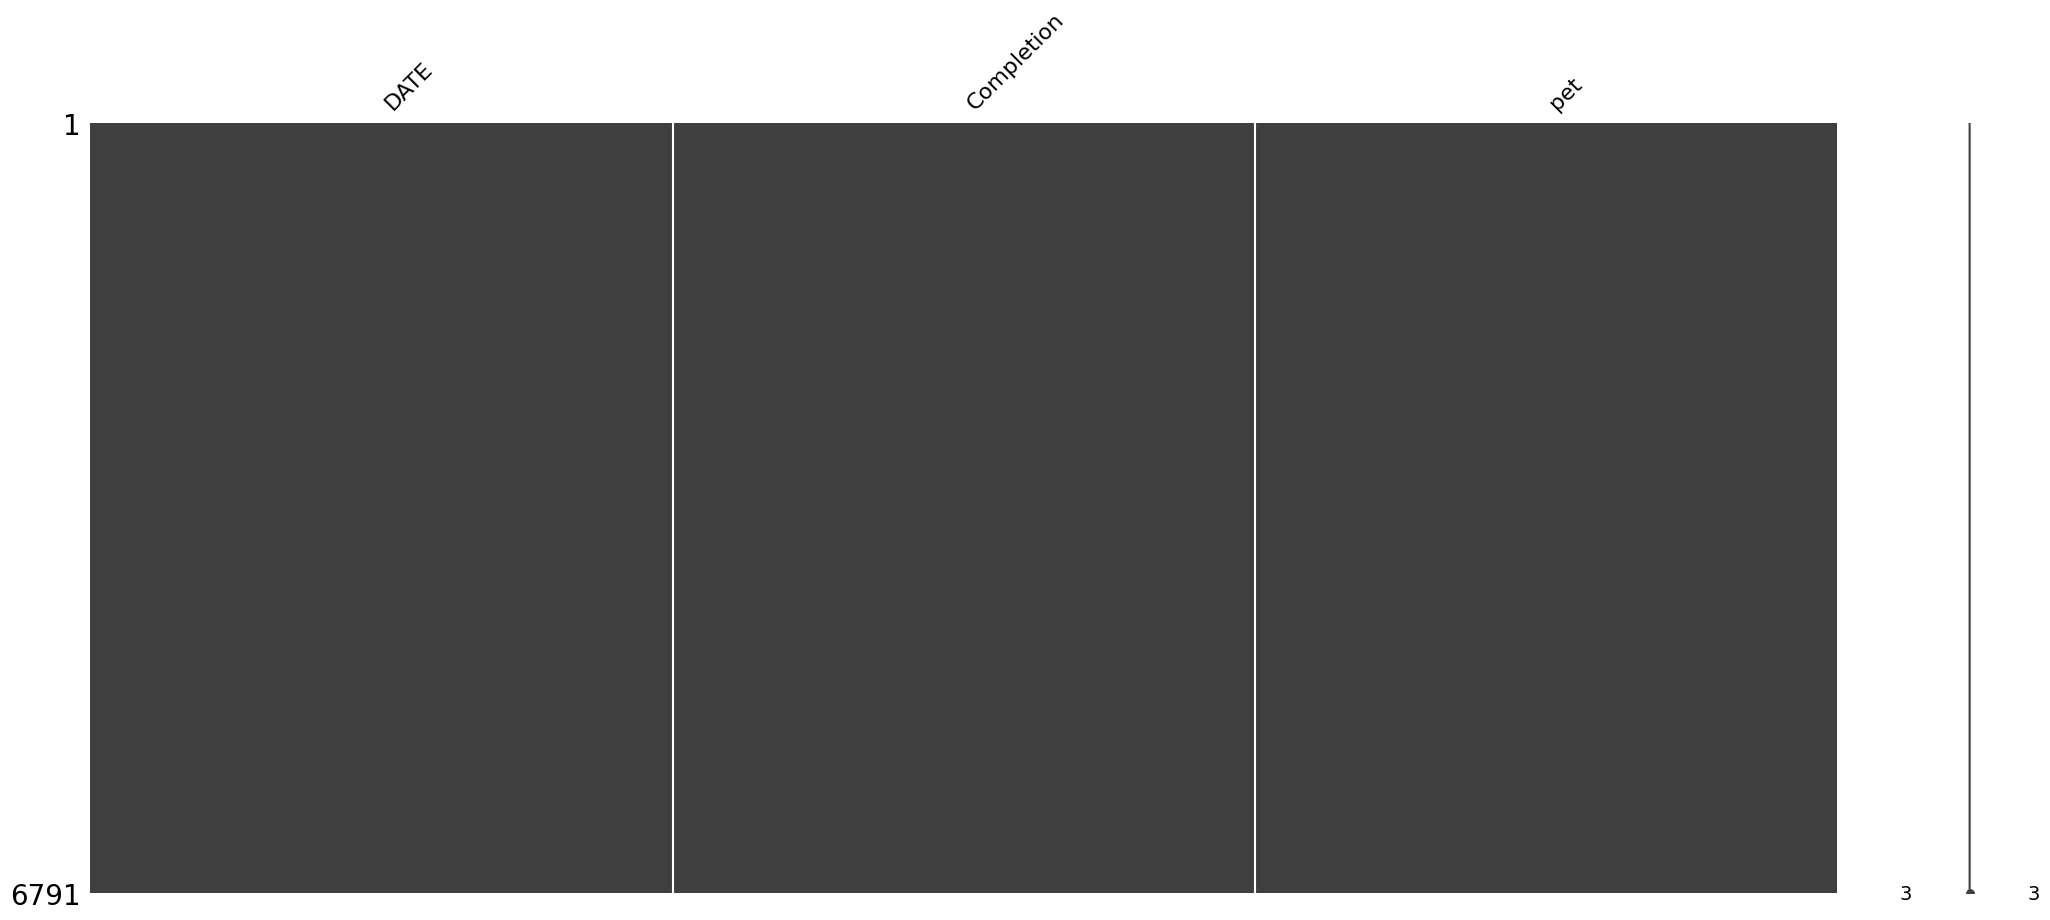

In [371]:
# substituindo os NaN de 'Pregnancies' e 'Outcome' por 0 - voltando aos valores originais destas colunas
prodwellSemMissings['pet'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(prodwellSemMissings)

In [372]:
prodwellSemMissings.head()

DATE Completion     pet
0 1964-04-01     AL-1:A  4119.0
1 1964-05-01     AL-1:A  9788.0
2 1964-06-01     AL-1:A  9003.0
3 1964-07-01     AL-1:A  8635.0
4 1964-08-01     AL-1:A  7568.0

In [373]:
prodwellSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        6791 non-null   datetime64[ns]
 1   Completion  6791 non-null   object        
 2   pet         6791 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 159.3+ KB


In [374]:
fig=px.scatter(masterwell,x="xcoor", y="ycoor", width=1000, height=800,
           labels={
                     "xcoor": "Coordenadas X (m)",
                     "ycoor": "Coordenadas Y (m)",
                 },
                title="Localização dos poços - Field A", text="Wellbore")

fig.update_traces(textposition="bottom center")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_layout(plot_bgcolor='white',
                  title_x=0.5)
fig.show()

In [375]:
fig=px.scatter(masterwell,x="xcoor", y="ycoor", color= "Sand", width=1000, height=800,
           labels={
                     "xcoor": "Coordenadas X (m)",
                     "ycoor": "Coordenadas Y (m)",
                     "Sand": "Zona Produtora"
                 },
                title="Localização dos poços pelo Zona Produtora - Field A", text="Wellbore")


fig.update_traces(textposition="bottom center")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_layout(plot_bgcolor='white',
                  title_x=0.5)
fig.show()

In [376]:
def duong(t, qi, m, a):

    qd = (qi * np.power(t,-m))* np.exp((a / (1 - m)) * ((np.power(t,(1-m))) - 1))
    return qd

def arps(t, b, qi, Di):
    if b==0:
        qa= qi*np.exp(-Di*t)
    else:
        qa= qi/((1+b*Di*t)**(1/b))
    return qa

In [377]:
prodwellSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        6791 non-null   datetime64[ns]
 1   Completion  6791 non-null   object        
 2   pet         6791 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 159.3+ KB


In [378]:
df=prodwellSemMissings
df.head()

DATE Completion     pet
0 1964-04-01     AL-1:A  4119.0
1 1964-05-01     AL-1:A  9788.0
2 1964-06-01     AL-1:A  9003.0
3 1964-07-01     AL-1:A  8635.0
4 1964-08-01     AL-1:A  7568.0

In [379]:
welluniq = prodwellSemMissings['Completion'].unique()
#list(rodwellSemMissings.Completion)
pozos = list(welluniq)
print(type(pozos))

<class 'list'>


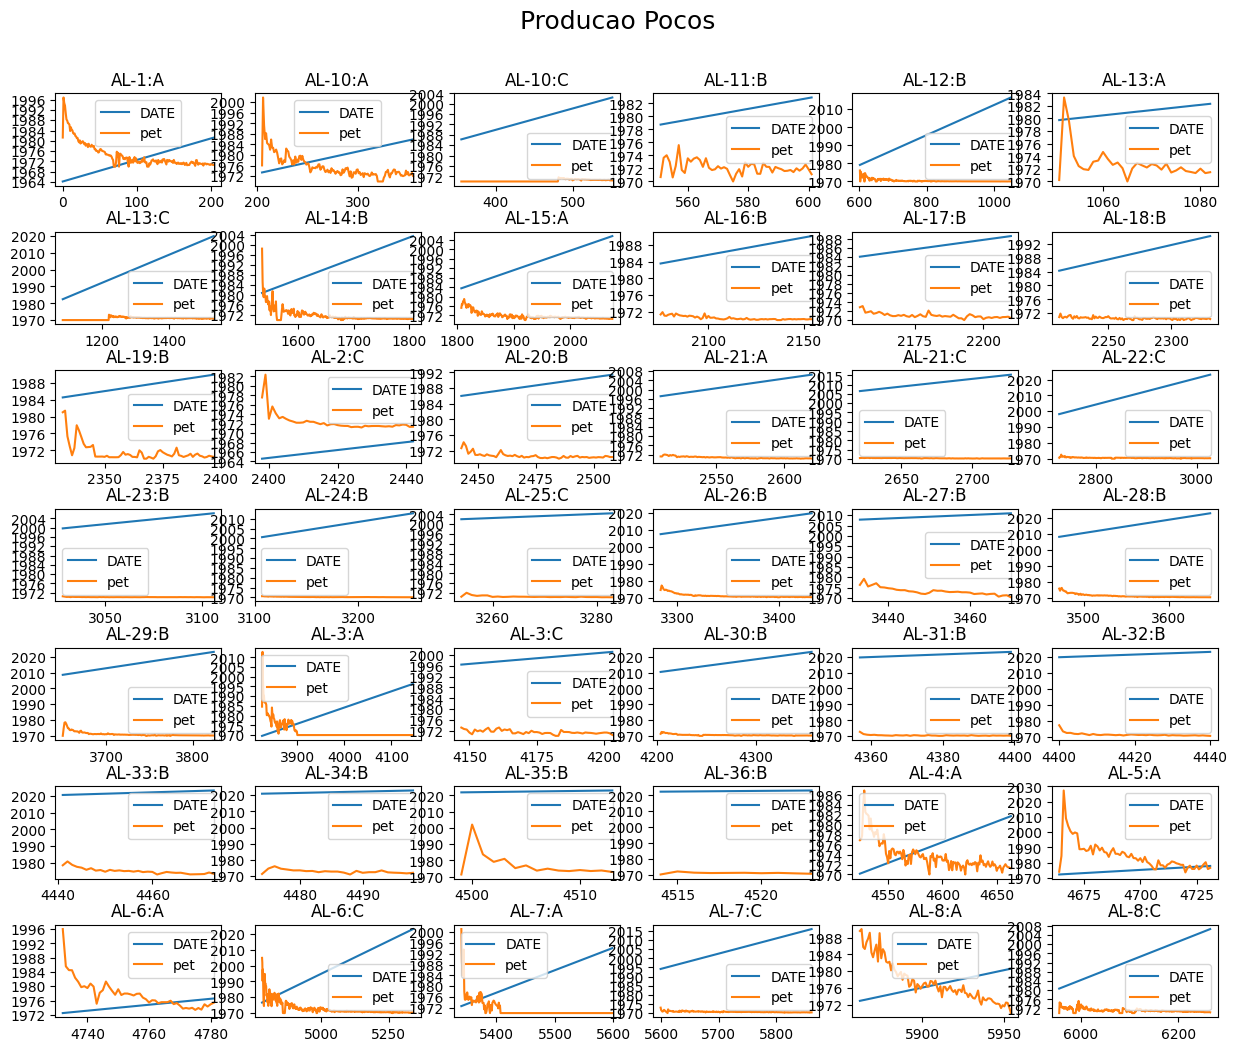

In [387]:
# define subplot grid
fig, axs = plt.subplots(nrows=7, ncols=6, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Producao Pocos", fontsize=18, y=0.95)

# loop through tickers and axes
for Completion, ax in zip(pozos, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df[df["Completion"] == Completion].plot(ax =ax)

    # chart formatting
    ax.set_title(Completion.upper())
    ax.get_legend()
    ax.set_xlabel("")

plt.show()

In [ ]:
welluniq = prodwellSemMissings['Completion'].unique()
#list(rodwellSemMissings.Completion)
pozos = list(welluniq)
print(type(pozos))

<class 'list'>


In [ ]:
ncols = 3
nrows = len(pozos) // ncols + (len(pozos) % ncols > 0)

KeyError: ignored

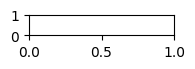

In [ ]:
for n, pozo in enumerate(pozos):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on the new subplot axis
    prodwellSemMissings[prodwellSemMissings['Completion'] == pozos].plot(ax=ax)

    # chart formatting
    ax.set_title(pozos.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

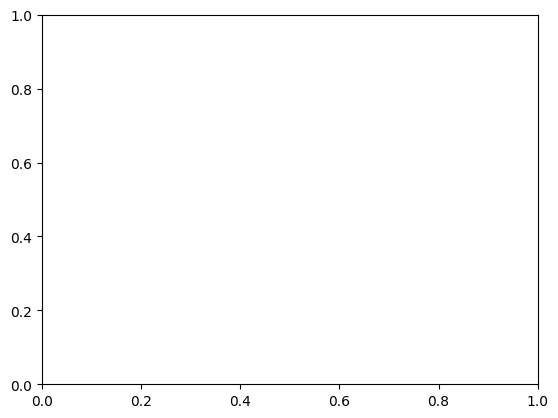

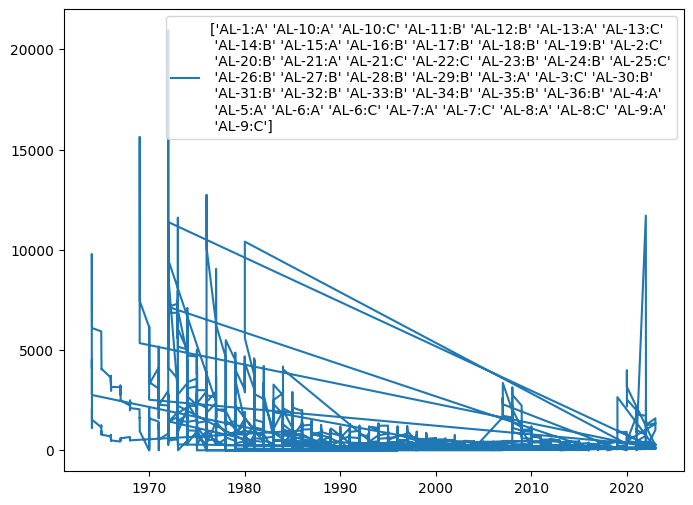

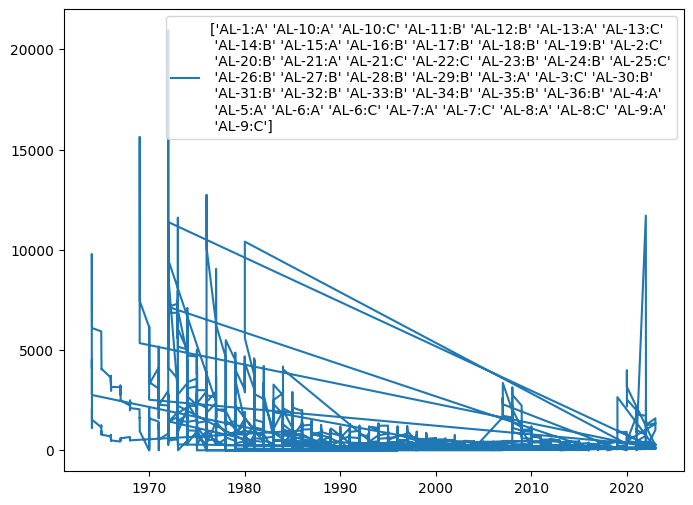

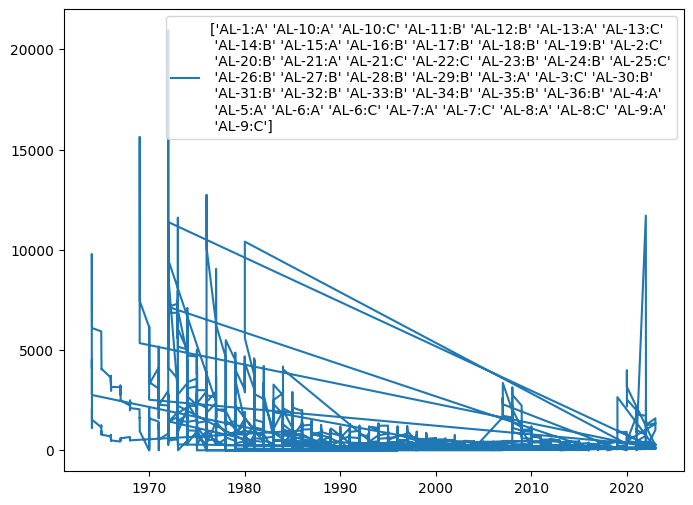

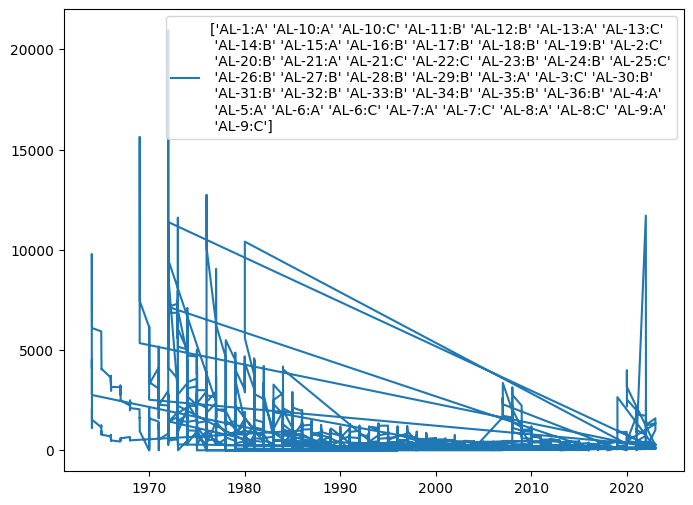

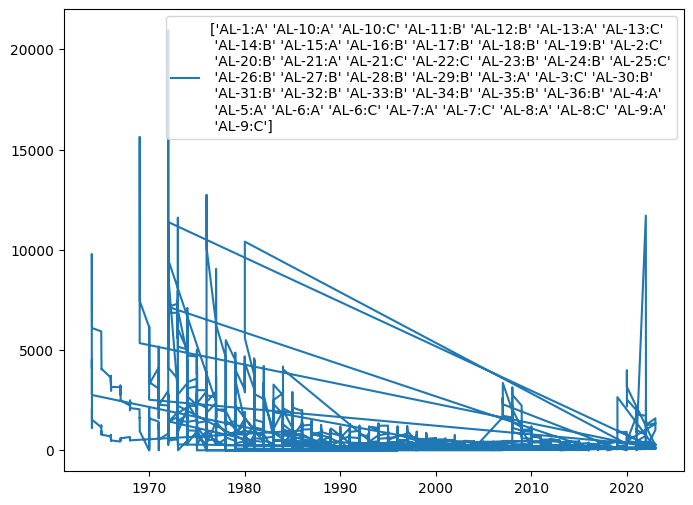

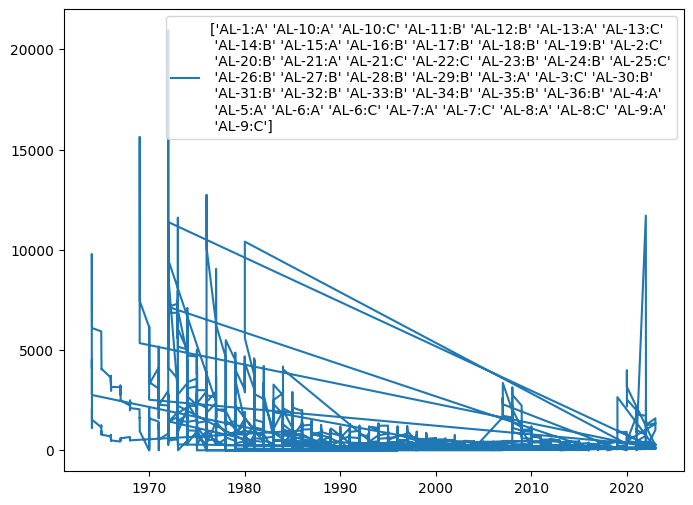

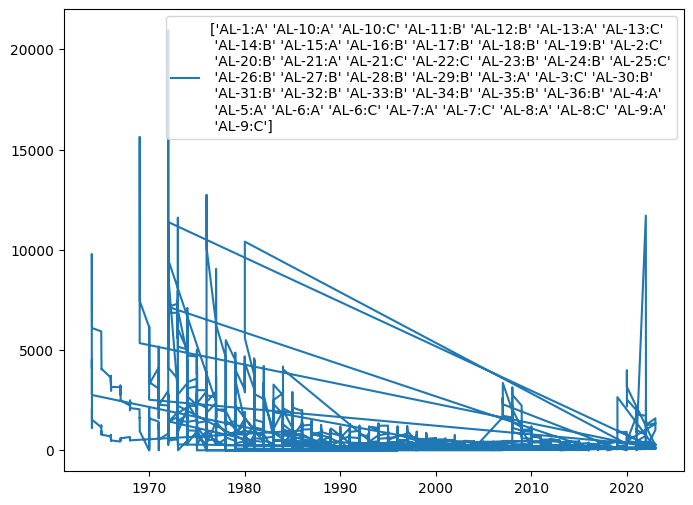

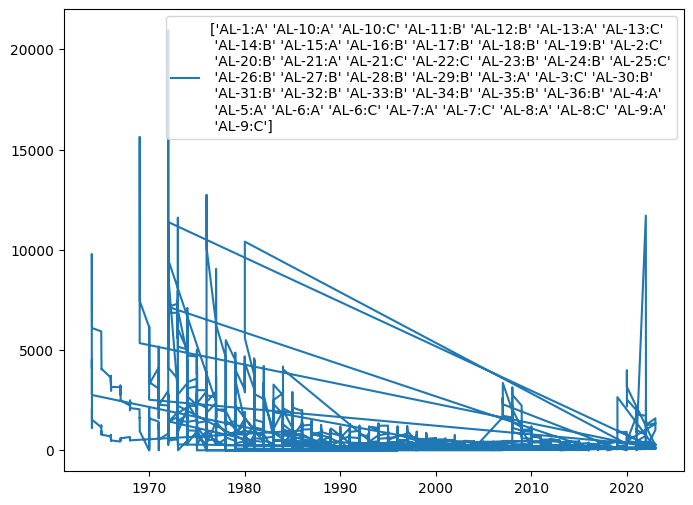

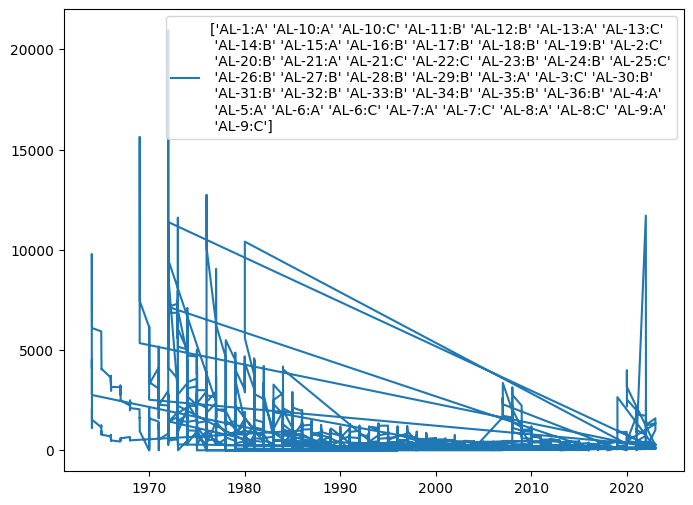

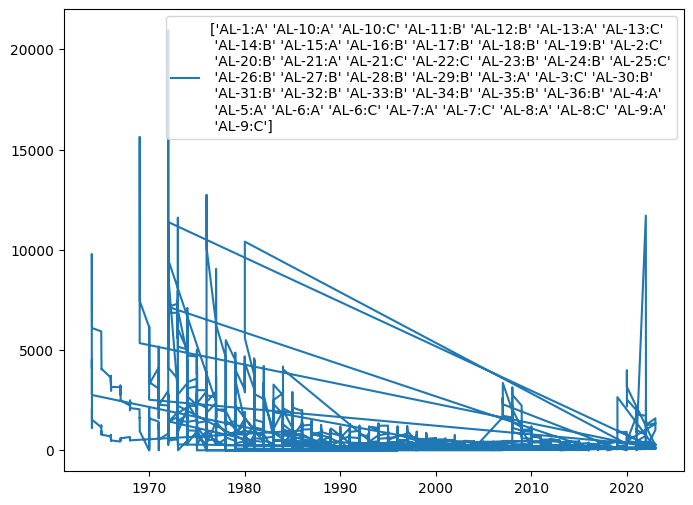

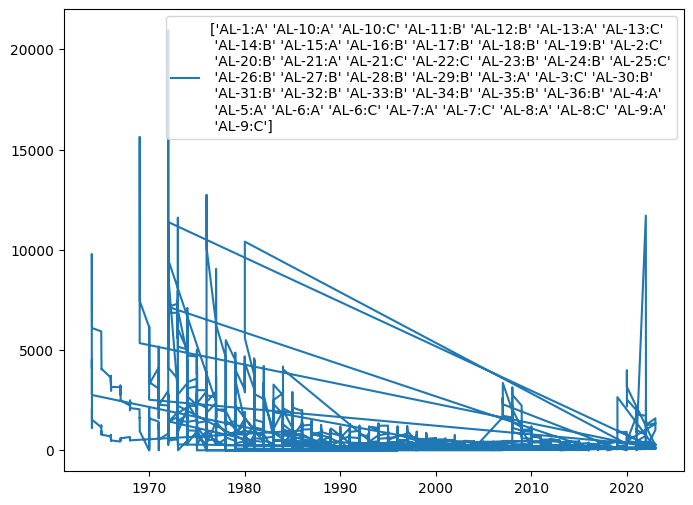

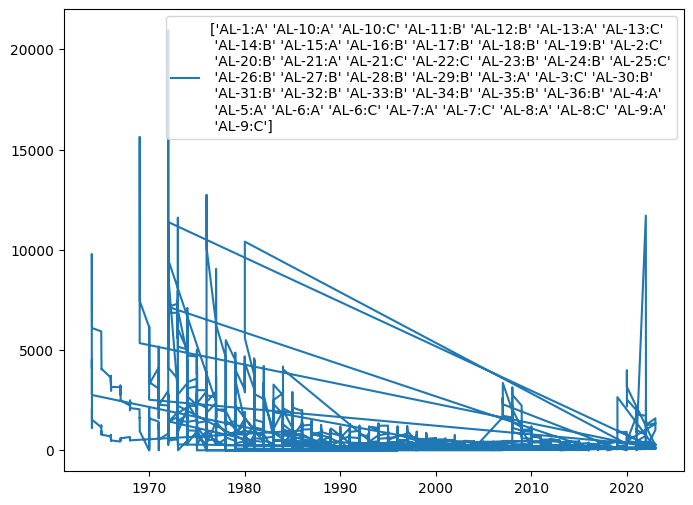

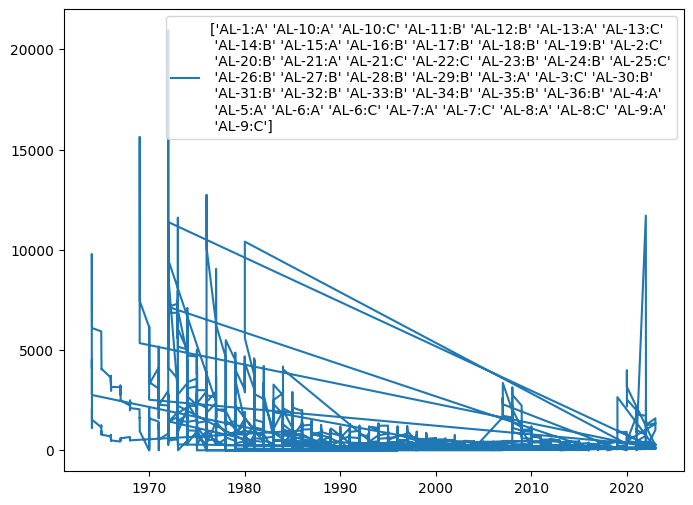

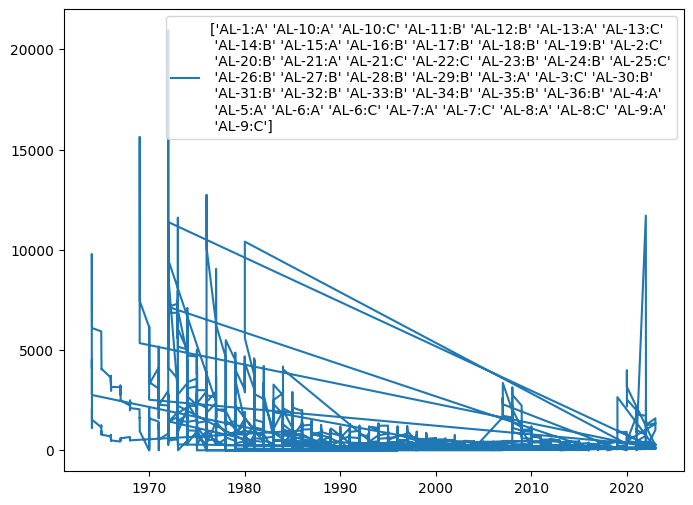

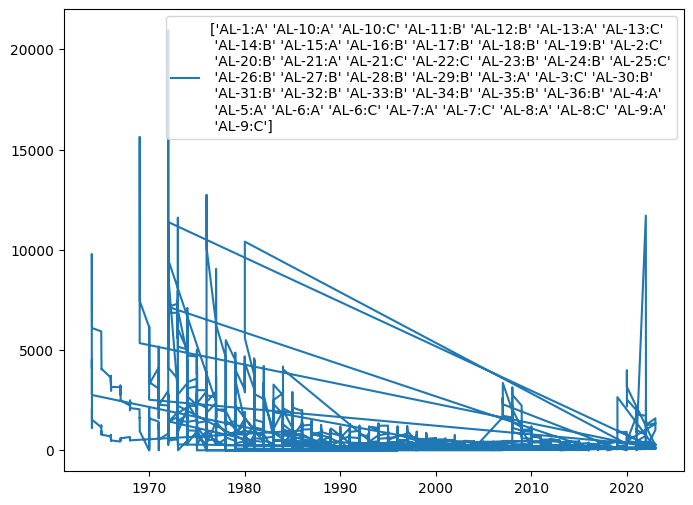

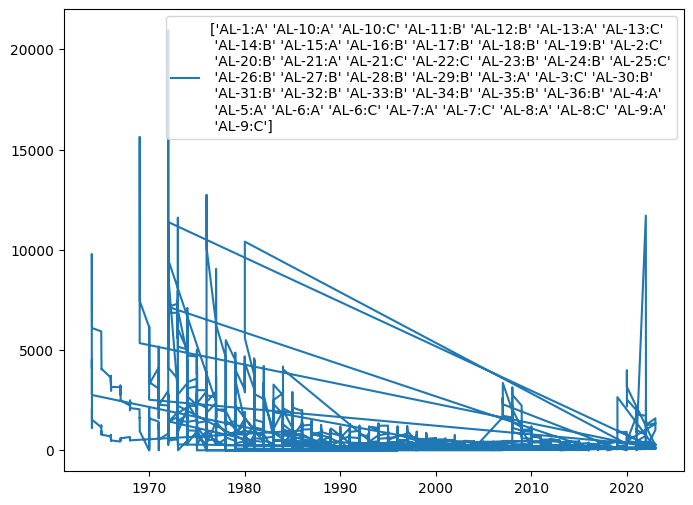

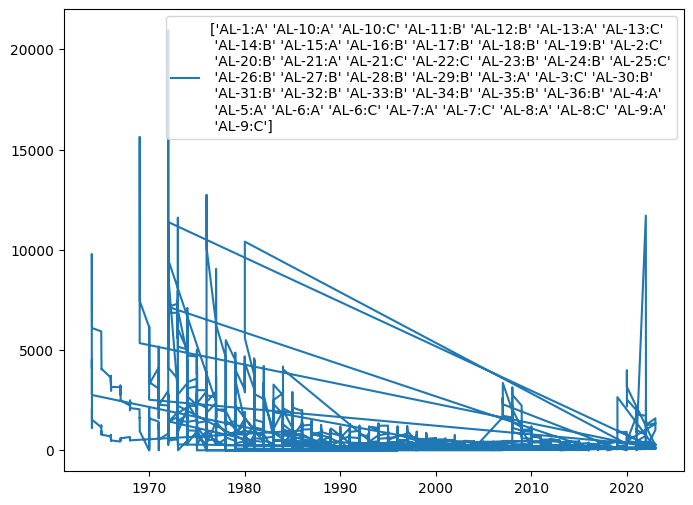

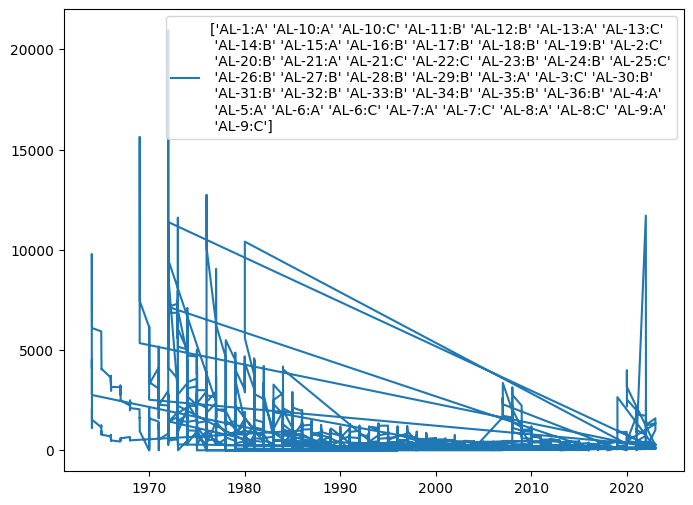

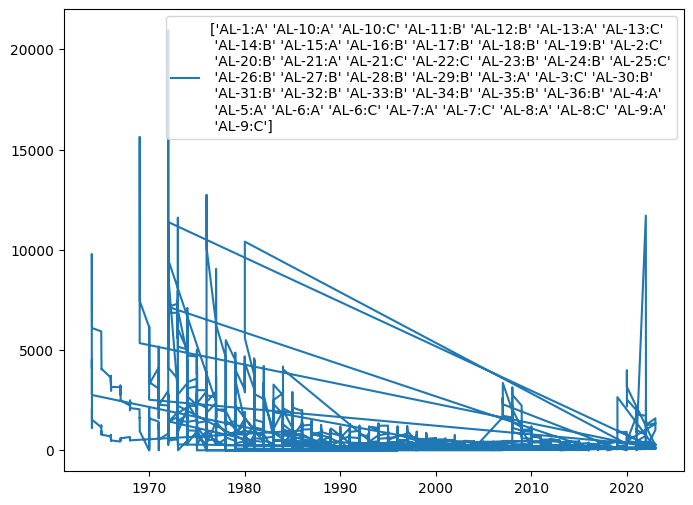

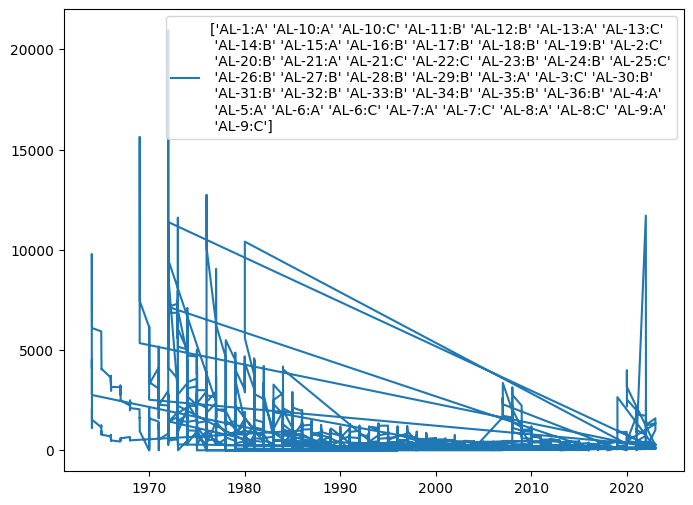

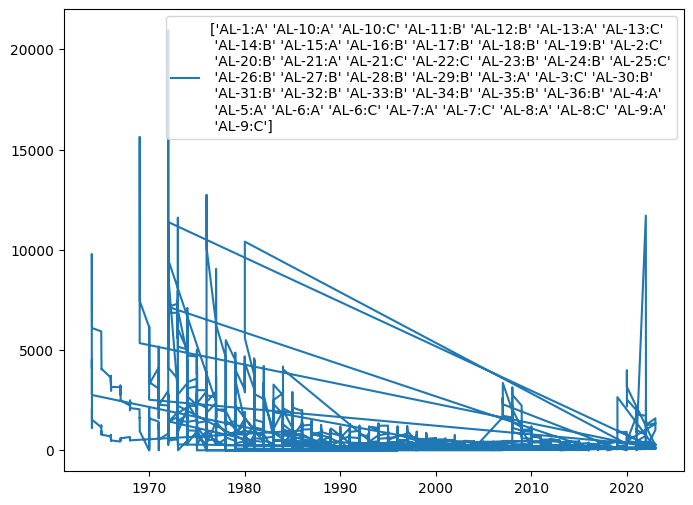

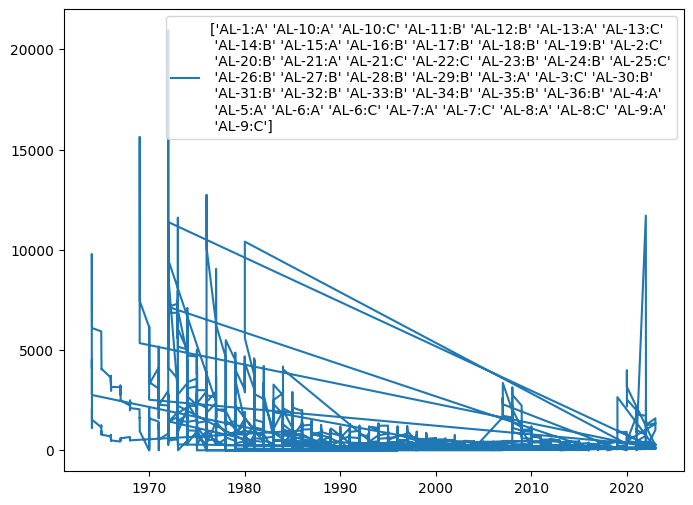

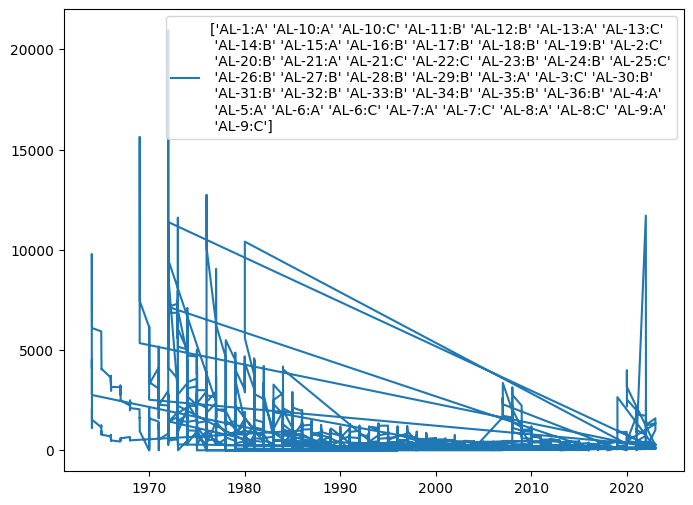

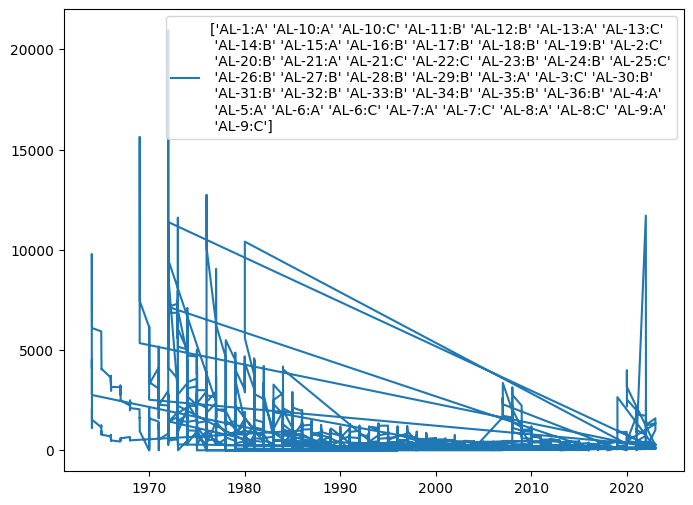

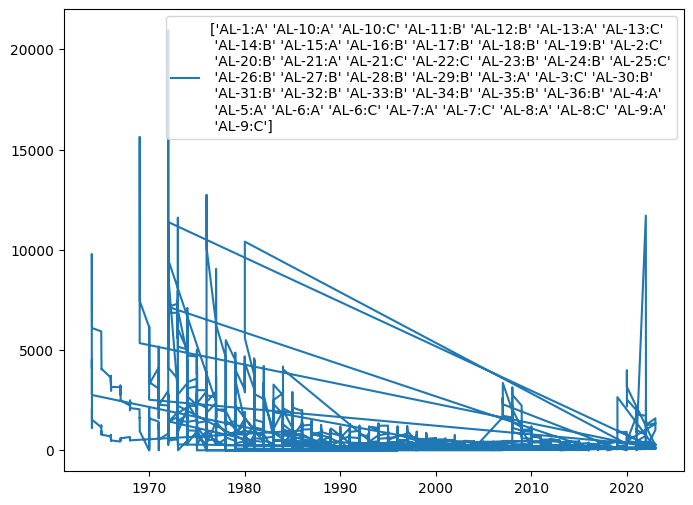

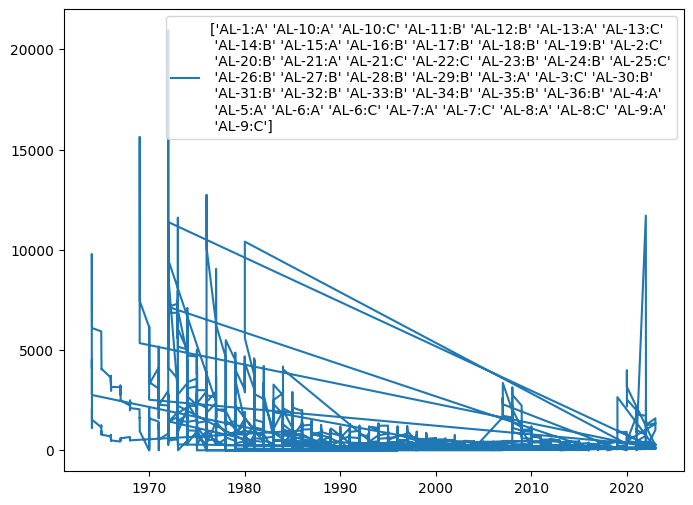

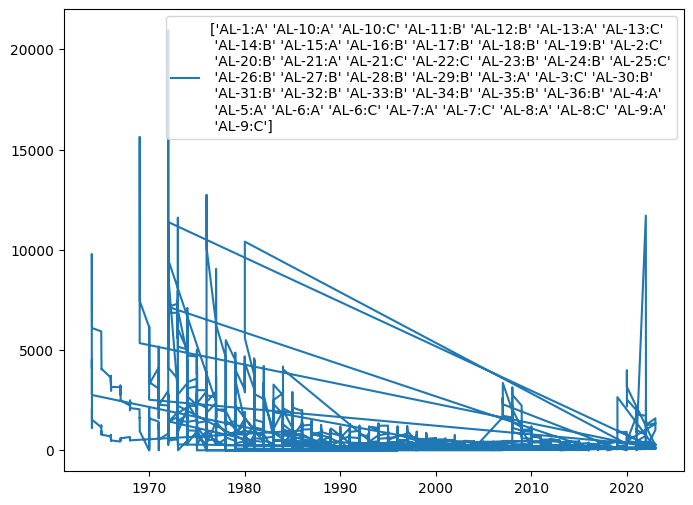

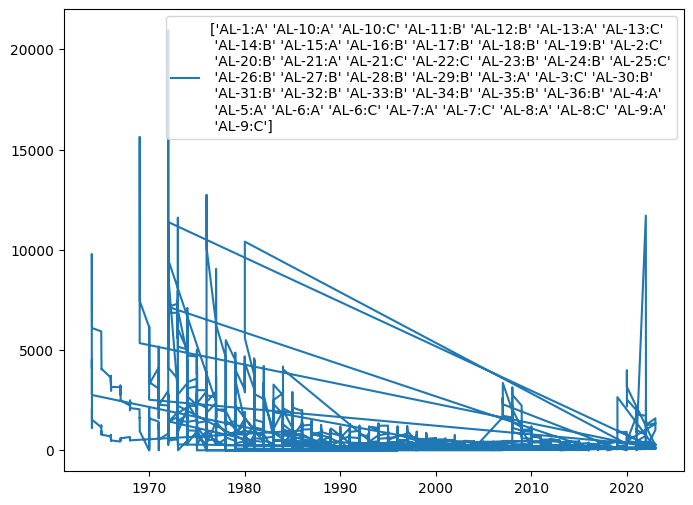

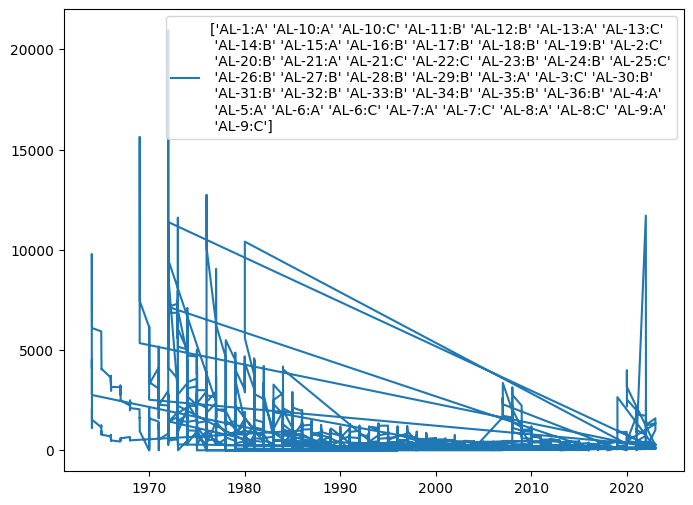

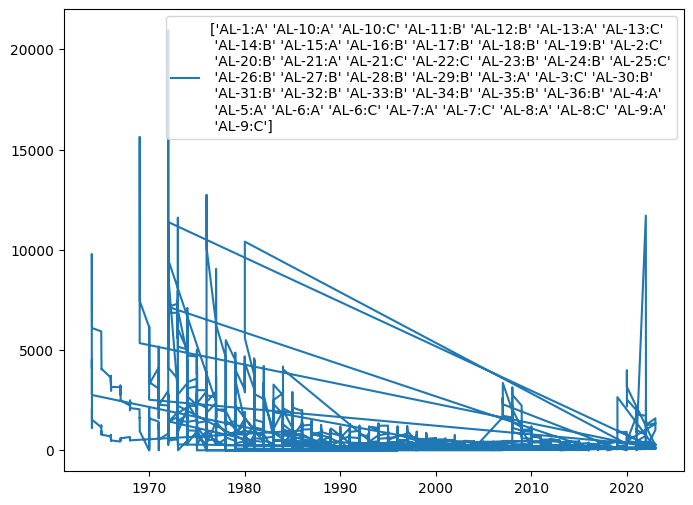

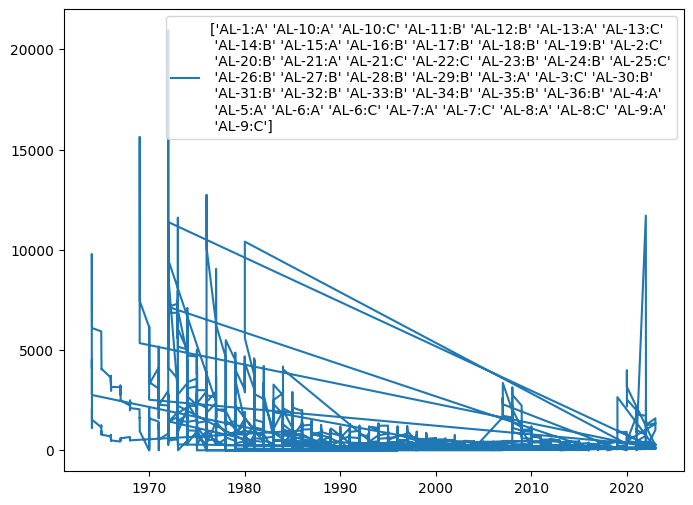

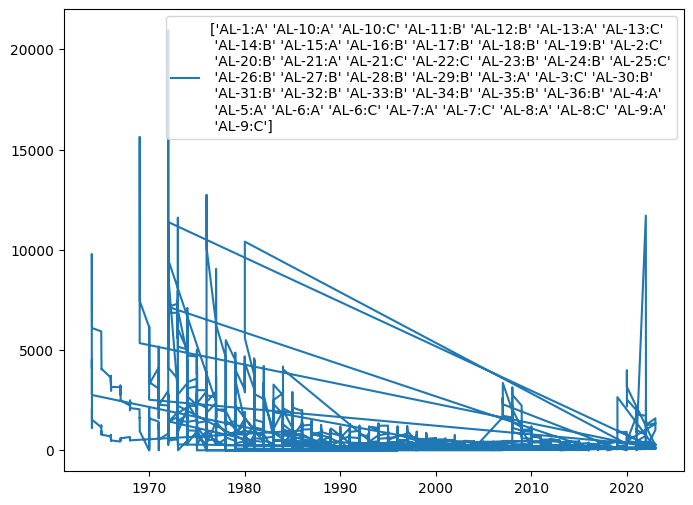

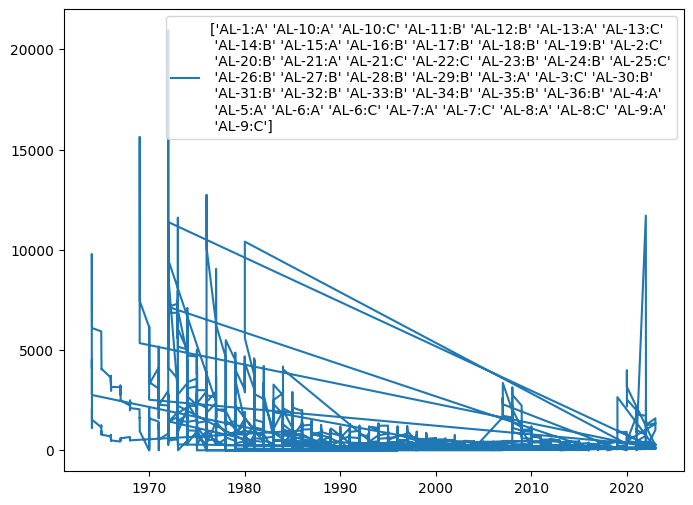

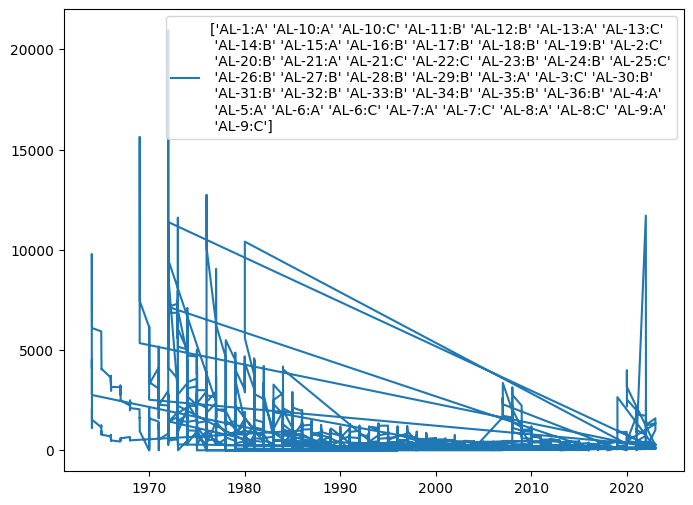

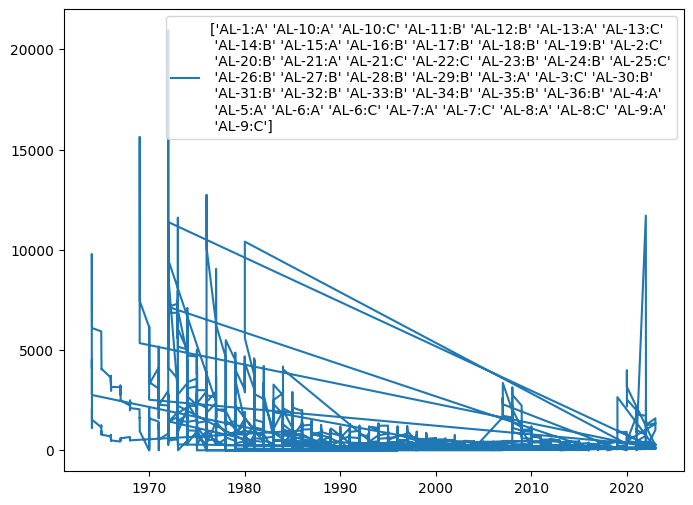

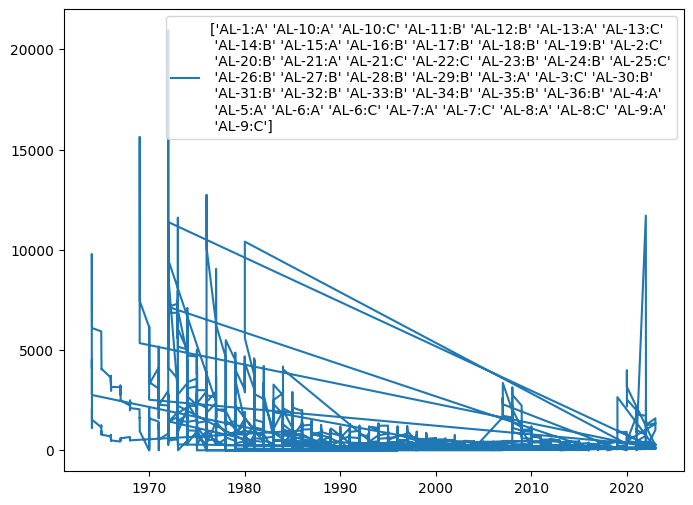

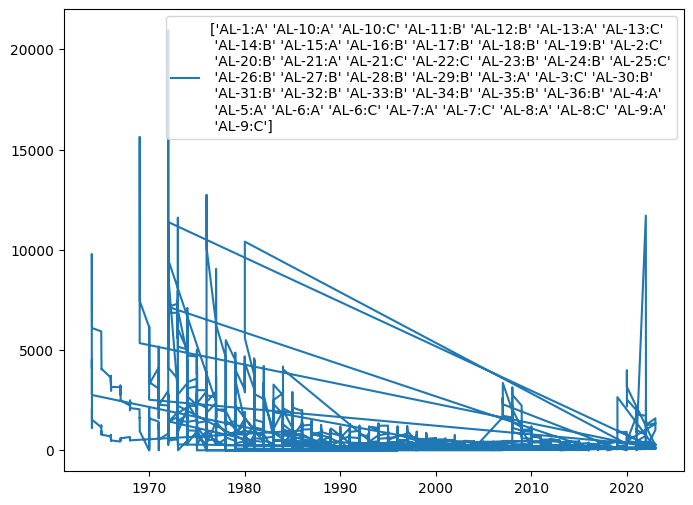

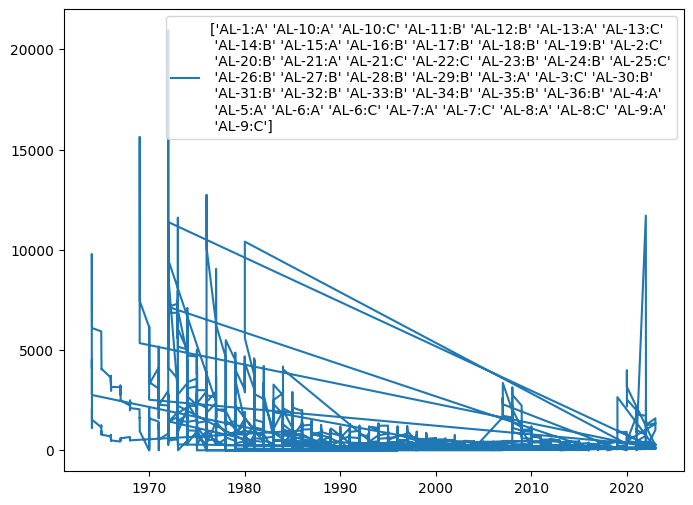

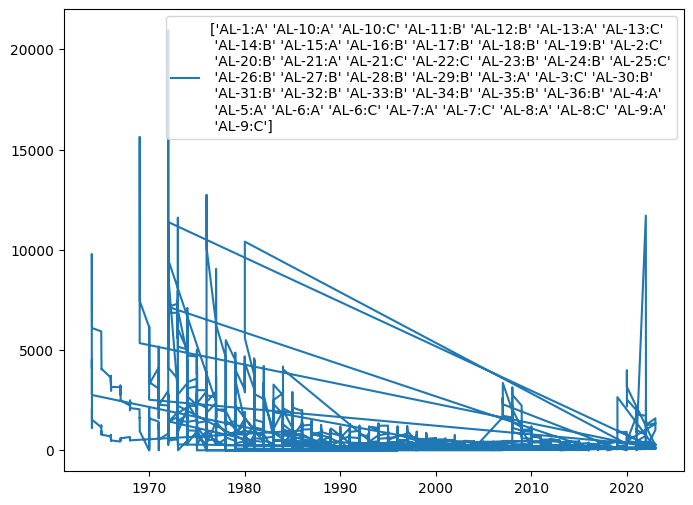

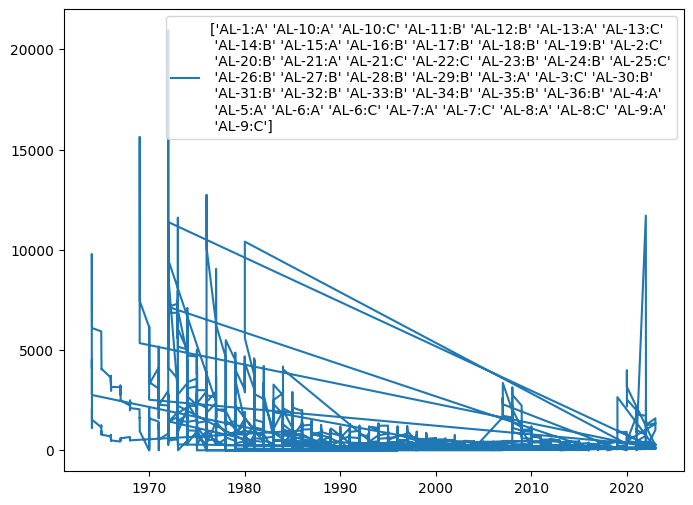

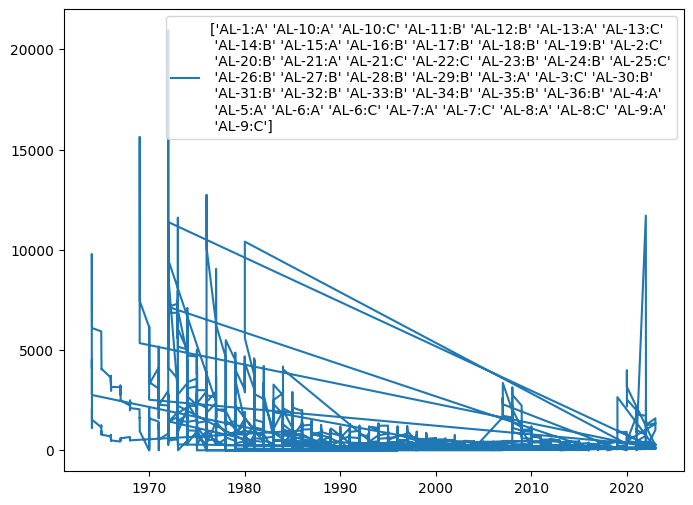

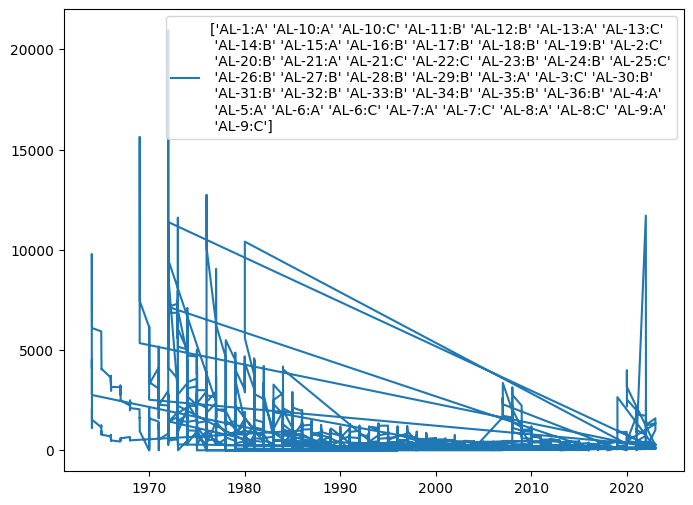

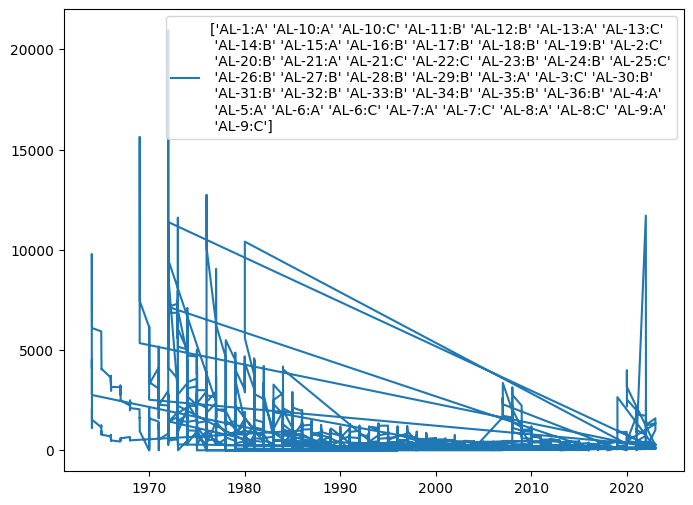

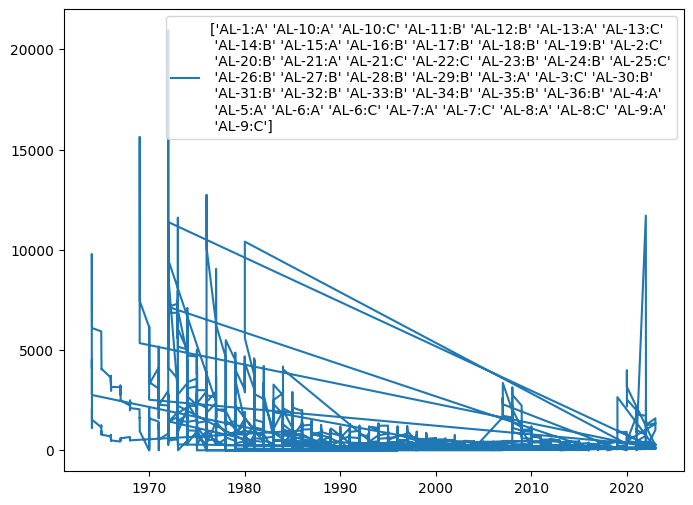

In [ ]:
for i, pozo in enumerate(pozos):
    plt.figure(figsize=(8,6))
    plt.plot(prodwellSemMissings['DATE'], prodwellSemMissings['pet'], label=pozos)
    plt.legend()
    plt.show()